In [85]:
# Look across all previously generated figures and tables and write at least three observations 
# or inferences that can be made from the data. Include these observations at the top of notebook.

# 1) Mouse weight and average tumor volume on a Capomulin Regimen exhibit a strong positive relationship.
# 2) The Ramicane and Capomulin drug regimens had the highest total number of measurements in the study.
# 3) The Ketapril drug regimen had the highest variance and standard deviation for tumor volume measurements.

## Observations and Insights 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (merge)
merged_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Verify column data types
merged_df.dtypes

# Verify it's a DataFrame
type(merged_df)

# Display the data table for preview
merged_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [87]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Note - this will only show duplicates not the first time it appears!
dup_df = merged_df[merged_df.duplicated(["Mouse ID","Timepoint"])]
dup_df["Mouse ID"]


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [92]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Using the aggregation method, produce the same summary statistics in a single line

# Do the groupby for regimen FIRST
drug_regimen_groupby = clean_df.groupby(["Drug Regimen"])

# Get each summary stat
mean = round(drug_regimen_groupby["Tumor Volume (mm3)"].mean(),2)

median = round(drug_regimen_groupby["Tumor Volume (mm3)"].median(),2)

variance = round(drug_regimen_groupby["Tumor Volume (mm3)"].var(),2)

STD = round(drug_regimen_groupby["Tumor Volume (mm3)"].std(),2)

SEM = round(drug_regimen_groupby["Tumor Volume (mm3)"].sem(),2)

# Create the DF (a dictionary of lists)
summary_table_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                                 "STDEV": STD, "SEM": SEM})
summary_table_df

,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

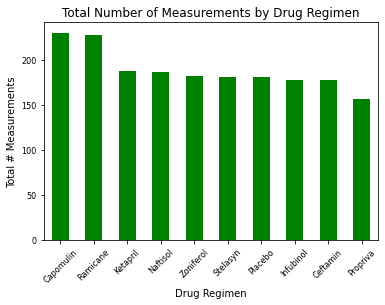

<Figure size 432x288 with 0 Axes>

In [93]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Value counts of drug regimen (counts of unique values)
measurement_count = clean_df["Drug Regimen"].value_counts()
measurement_count

# Plot the bar chart using pandas
measurements_bar = measurement_count.plot(kind= "bar", figsize=(6,4), 
                                          facecolor= "green", align= "center", fontsize= "8", rot = 45)

# Formatting - title and axes
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total # Measurements")

# Show and layout
plt.show()
plt.tight_layout()                                     
                                        

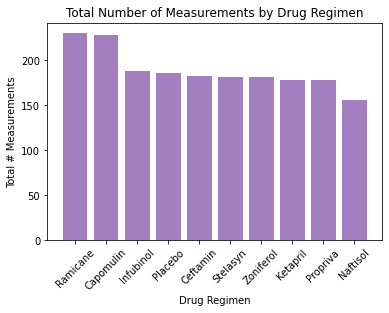

<Figure size 432x288 with 0 Axes>

In [94]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Get x and y axes
# Find x by getting the unique drug regimens (return unique values), store in a variable
drug_regimens = clean_df["Drug Regimen"].unique()
x_axis = drug_regimens
y_axis = clean_df["Drug Regimen"].value_counts()

# Plot the bar chart using pyplot
plt.bar(x_axis, y_axis, facecolor = "indigo", alpha = 0.5,)

# X-ticks rotation
plt.xticks(rotation = 45)

# Formatting - title and axes 
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total # Measurements")

# Show and layout
plt.show()
plt.tight_layout()     

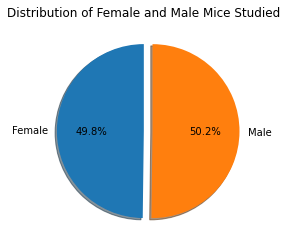

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Groupby to get male and female
count_df = clean_df.groupby("Sex")
# Get the number of unique (return Series with number of distinct observations)
count = count_df.nunique()
count

# Plot the bar chart using pandas 
female_male_pie = count.plot(kind= "pie", y= "Mouse ID", 
                             legend = False, autopct="%1.1f%%", explode=(0,0.1), shadow = True, startangle=90)

# Formatting - title and axes
plt.ylabel(" ")
plt.title("Distribution of Female and Male Mice Studied")

plt.show()

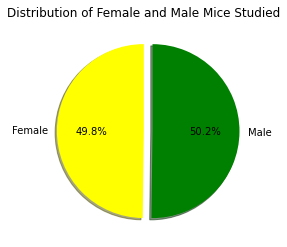

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Same groupby and .nunique
count_df = clean_df.groupby("Sex")
count = count_df.nunique()
count

# Set up pie attributes
my_labels = ["Female", "Male"]
my_sizes = [49.8, 50.2]
my_colors = ["yellow", "green"]
explode = [0,0.1]

# Plot the pie chart using pyplot
plt.pie(my_sizes, labels= my_labels, colors= my_colors, 
       explode= explode,
       autopct="%1.1f%%",
        shadow= True, 
       startangle= 90)


# Formatting - title and axes
plt.ylabel(" ")
plt.title("Distribution of Female and Male Mice Studied")

plt.show()


## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Groupby mouse ID and max timepoint
mouse_groupby = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
mouse_groupby.head(25)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(mouse_groupby, clean_df, on=["Mouse ID","Timepoint"], how="inner")
merge_df.head(10)
    


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

vol_data_capomulin = []
vol_data_ramicane = []
vol_data_infubinol = []
vol_data_ceftamin = []

# Set up a dictionary of lists for the DataFrame later
vol_data = {
    "Capomulin": vol_data_capomulin,
    "Ramicane": vol_data_ramicane, 
    "Infubinol": vol_data_infubinol,
    "Ceftamin": vol_data_ceftamin
}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment_index, treatment in enumerate(treatments):
    for index, row in merge_df.iterrows():
    # Locate the rows which contain mice on each drug and get the tumor volumes
        if row["Drug Regimen"] == treatment:
            vol_data[treatment].append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] not in treatments:
            merge_df.drop(index, inplace=True)

#vol_data

# add subset 
    
# Determine outliers using upper and lower bounds
for treatment, vol_list in vol_data.items():
    vol_list.sort()
    
#print(vol_data)

# Create the DataFrame from the dictionary of lists that was built
vol_df =pd.DataFrame(vol_data)
vol_df
    
    
#Capomulin statistics
capo_quartiles = vol_df["Capomulin"].quantile([0.25,0.5,0.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)

print(f"The IQR for the Capomulin treatment tumor volumes is {round(capo_iqr,2)}.")
print(f"Values below {round(capo_lower_bound,2)} and values above {round(capo_upper_bound,2)} could be outliers.")

#Ramicane statistics
ram_quartiles = vol_df["Ramicane"].quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"The IQR for the Ramicane treatment tumor volumes is {round(ram_iqr,2)}.")
print(f"Values below {round(ram_lower_bound,2)} and values above {round(ram_upper_bound,2)} could be outliers.")

#Infubinol statistics
inf_quartiles = vol_df["Infubinol"].quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(f"The IQR for the Infubinol treatment tumor volumes is {round(inf_iqr,2)}.")
print(f"Values below {round(inf_lower_bound,2)} and values above {round(inf_upper_bound,2)} could be outliers.")

#Ceftamin statistics
cef_quartiles = vol_df["Ceftamin"].quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(f"The IQR for the Ceftamin treatment tumor volumes is {round(cef_iqr,2)}.")
print(f"Values below {round(cef_lower_bound,2)} and values above {round(cef_upper_bound,2)} could be outliers.")

The IQR for the Capomulin treatment tumor volumes is 7.78.
Values below 20.7 and values above 51.83 could be outliers.
The IQR for the Ramicane treatment tumor volumes is 9.1.
Values below 17.91 and values above 54.31 could be outliers.
The IQR for the Infubinol treatment tumor volumes is 11.48.
Values below 36.83 and values above 82.74 could be outliers.
The IQR for the Ceftamin treatment tumor volumes is 15.58.
Values below 25.36 and values above 87.67 could be outliers.


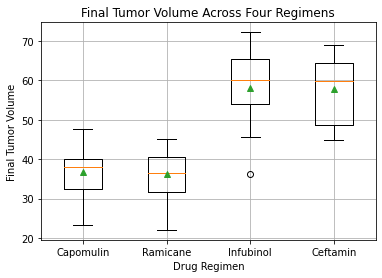

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Calculate the SEM
capo_sem = vol_df["Capomulin"].sem()
ram_sem = vol_df["Ramicane"].sem()
inf_sem = vol_df["Infubinol"].sem()
cef_sem = vol_df["Ceftamin"].sem()

# Calculate the means
capo_mean = vol_df["Capomulin"].mean()
ram_mean = vol_df["Ramicane"].mean()
inf_mean = vol_df["Infubinol"].mean()
cef_mean = vol_df["Ceftamin"].mean()

#Set up the plot
fig, ax = plt.subplots()

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume")
ax.set_title("Final Tumor Volume Across Four Regimens")

ax.boxplot(vol_data.values(), showmeans=True)

ax.set_xticklabels(vol_data.keys())

plt.grid()

plt.show()

## Line and Scatter Plots

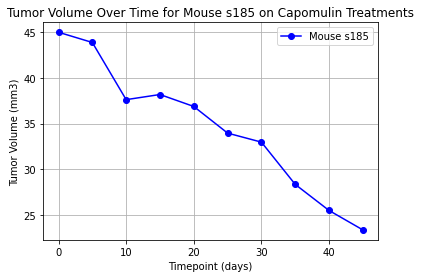

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Locate the data in Capomulin rows
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capo_df

# Locate a single mouse within the Capomulin rows
mouse_data = capo_df.loc[capo_df["Mouse ID"] == "s185",:]
mouse_data

# Assign variables for tumor volume and timepoint (the axes)
tumor_volume = mouse_data["Tumor Volume (mm3)"]
timepoint = mouse_data["Timepoint"]

#Set up the plot
plt.plot(timepoint, tumor_volume, color = "blue", label = "Mouse s185", marker = "o")

plt.legend(loc = "best")
plt.title("Tumor Volume Over Time for Mouse s185 on Capomulin Treatments")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()
plt.show()

mouse_data

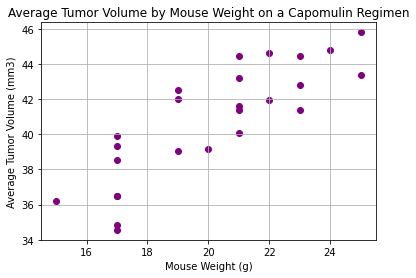

In [101]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Locate the data in Capomulin rows
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capo_df
# Groupby Mouse ID
mouse_ID_groupby = capo_df.groupby(["Mouse ID"])
mouse_ID_groupby

# Get the average tumor volume
avg_t_df = pd.DataFrame(mouse_ID_groupby["Tumor Volume (mm3)"].mean())
avg_t_df

# Rename the column to reflect the average that was calculated
renamed_avg_t_df = avg_t_df.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# Sort the DF by avg tumor volume 
sort_avg_t_df = renamed_avg_t_df.sort_values("Average Tumor Volume (mm3)")
sort_avg_t_df

# Merge the Capomulin data with the sorted average data to prepare for the DF
merged_df = pd.merge(capo_df, sort_avg_t_df, on = "Mouse ID", how = "inner")
merged_df

# Add the weight and average volume to the DF
weight_volume_df = merged_df[["Weight (g)", "Average Tumor Volume (mm3)"]]

# Get rid of any duplicate items
final_df = weight_volume_df.drop_duplicates()
final_df

# Get x and y to be used by the plot
x_values = final_df["Weight (g)"]
y_values = final_df["Average Tumor Volume (mm3)"]

# Set up the plot
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", alpha = 1)
plt.title("Average Tumor Volume by Mouse Weight on a Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

In [102]:
# Calculate the correlation coefficient and linear regression model

# Correlation Coefficient
correlation_coefficient = st.pearsonr(x_values, y_values)
print(correlation_coefficient)

print(f"The correlation coefficient between both factors is {round(correlation_coefficient[0],2)}.")
# for mouse weight and average tumor volume for the Capomulin regimen


(0.8419363424694718, 1.3225722434712687e-07)
The correlation coefficient between both factors is 0.84.


y = 0.95 x + 21.55
The r-squared value is: 0.71


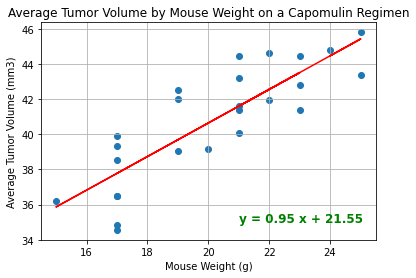

In [103]:
# Linear Regression Model

# Add the linear regression equation and line to the plot

# Step 1 - get the Linregress (returns slope, intercept, r value, p value, and stderr)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Step 2 - get values for y using line equation y=mx+b for annotate
regress_values = x_values * slope + intercept

# Step 3 - create the line equation for the plot
line_equation = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(line_equation)

# Step 4 - Scatter and plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Step 5 - Annotate needs a line
plt.annotate(line_equation,(21,35),fontsize = 12, color = "green", weight = "bold")

# Step 6 - r squared value
r_sq_value = rvalue**2
print(f"The r-squared value is: {round(r_sq_value,2)}")

plt.title("Average Tumor Volume by Mouse Weight on a Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()